<h3 align = "center"> Introduction to Differential Splicing Analysis with Python </h3>
<hr>
<h4 align = "center"> Bioinformatics with Python & Pandas </h4>

<h3 align = "center"> <img src="https://files.realpython.com/media/Python-Pandas-10-Tricks--Features-You-May-Not-Know-Watermark.e58bb5ce9835.jpg" width="500"/>

<h4 align = "center"> Paulo Caldas | FCT-NOVA | cOMICS Lab </h4>
<hr>

### Why Pandas?
- Pandas is one of the most powerful libraries for anything related with data science <br>
- Provides fast, flexible, easy and intuitive data manipulation of data frames <br>
- Allows to work with big data sets and/or multiple files at once <br>

### About Pandas
- `pandas` runs on top of `numpy` 
- Provides high-level data structure (Data Frames) --> they look like spreadsheets!
- Contains built-in functions to clean, group, merge, and concatenate tabular data
- Easy to apply `numpy` and `scipy` functions on tabular data

### Install Pandas
... if you installed Anaconda you're good to go!
- Anaconda is a popular distribution of the Python (and R programming languages actually!) for scientific computing and data science.
- It comes with a wide range of pre-installed packages commonly used in these fields - making it convenient for users to get startedision tasks.

### <span style='color:darkblue'> Step 0 - Import Packages

In [576]:
# packages for data manipulation and math operations
import pandas as pd
import numpy as np

# packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [577]:
# rationale behind packages and functions if needed

### <span style='color:darkblue'> Step 1 - Import Data (Output from VastTools)
- more on vast-tools: https://github.com/vastgroup/vast-tools
- data: PSI values from mammalian organ development: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6658352/

In [578]:
# import data - explore table
inclusion_table = pd.read_table('data/betaAS_inclusion_table_reshaped.txt')
inclusion_table

,GENE,EVENT,COORD,LENGTH,COMPLEX,FOREBRAIN.ADOLESCENT_ERR2598266,FOREBRAIN.ADOLESCENT_ERR2598267,FOREBRAIN.ADOLESCENT_ERR2598268,FOREBRAIN.ADOLESCENT_ERR2598269,FOREBRAIN.ELDERLY_ERR2598280,...,HEART.ADOLESCENT_ERR2598270,HEART.MIDDLE_ADULT_ERR2598307,HEART.YOUNG_ADULT_ERR2598351,LIVER.ADOLESCENT_ERR2598275,LIVER.ELDERLY_ERR2598284,LIVER.ELDERLY_ERR2598285,LIVER.MIDDLE_ADULT_ERR2598310,LIVER.YOUNG_ADULT_ERR2598357,LIVER.YOUNG_ADULT_ERR2598358,LIVER.YOUNG_ADULT_ERR2598359
0,LAS1L,HsaEX0035417,chrX:64734703-64734850,148,S,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,KRIT1,HsaEX0035028,chr7:91843925-91844091,167,S,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,LAP3,HsaEX0035326,chr4:17598669-17598757,89,S,94.24,95.34,97.94,100.00,100.00,...,100.00,98.21,100.00,97.43,100.00,98.49,98.25,100.00,99.14,98.50
3,CD99,HsaEX0013932,chrX:2635646-2635693,48,S,74.32,100.00,97.67,100.00,96.29,...,92.50,94.71,94.65,90.74,92.49,96.69,88.61,98.55,95.41,100.00
4,SPATA20,HsaEX0061239,chr17:48625915-48625979,65,S,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,GNAS,HsaEX0027840,chr20:57474530-57474532,3,MIC,16.22,15.28,13.34,14.22,10.33,...,10.49,14.59,13.64,13.74,13.95,16.68,12.89,9.87,19.71,4.54
1682,AP2M1,HsaEX0004932,chr3:183898433-183898438,6,MIC,96.61,97.26,92.34,95.96,91.31,...,83.24,96.81,97.52,95.97,96.92,95.14,90.02,79.43,79.47,81.76
1683,PSAP,HsaEX0050522,chr10:73583645-73583653,9,MIC,94.02,96.51,58.55,93.72,91.46,...,12.05,96.49,90.69,98.00,98.07,92.63,90.02,13.43,9.57,12.94
1684,PHB2,HsaEX0046902,chr12:7075074-7075079,6,MIC,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


### <span style='color:darkblue'> Step 2 - General Exploratory Analysis 

In [579]:
inclusion_table.columns
#inclusion_table.info()
#inclusion_table.describe()

Index(['GENE', 'EVENT', 'COORD', 'LENGTH', 'COMPLEX',
       'FOREBRAIN.ADOLESCENT_ERR2598266', 'FOREBRAIN.ADOLESCENT_ERR2598267',
       'FOREBRAIN.ADOLESCENT_ERR2598268', 'FOREBRAIN.ADOLESCENT_ERR2598269',
       'FOREBRAIN.ELDERLY_ERR2598280', 'FOREBRAIN.ELDERLY_ERR2598281',
       'FOREBRAIN.MIDDLE_ADULT_ERR2598305',
       'FOREBRAIN.MIDDLE_ADULT_ERR2598306', 'FOREBRAIN.YOUNG_ADULT_ERR2598346',
       'FOREBRAIN.YOUNG_ADULT_ERR2598347', 'FOREBRAIN.YOUNG_ADULT_ERR2598348',
       'FOREBRAIN.YOUNG_ADULT_ERR2598349', 'FOREBRAIN.YOUNG_ADULT_ERR2598350',
       'HEART.ADOLESCENT_ERR2598270', 'HEART.MIDDLE_ADULT_ERR2598307',
       'HEART.YOUNG_ADULT_ERR2598351', 'LIVER.ADOLESCENT_ERR2598275',
       'LIVER.ELDERLY_ERR2598284', 'LIVER.ELDERLY_ERR2598285',
       'LIVER.MIDDLE_ADULT_ERR2598310', 'LIVER.YOUNG_ADULT_ERR2598357',
       'LIVER.YOUNG_ADULT_ERR2598358', 'LIVER.YOUNG_ADULT_ERR2598359'],
      dtype='object')

#### What type of alternative splicing events our analysis identified?

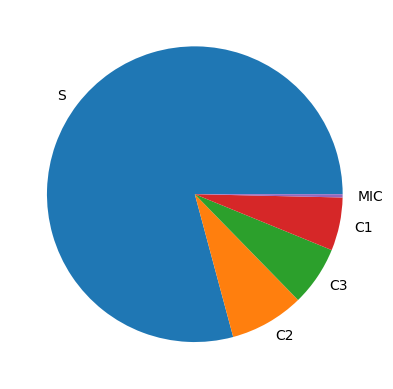

In [580]:
event_counts = inclusion_table['COMPLEX'].value_counts()

plt.pie(event_counts, labels=event_counts.index);

#### What are the most relevant events?

In [581]:
# sort events according to their relevance -> the ones that vary the most
psi_var = inclusion_table.filter(like = 'ERR').std(axis = 1) # compute variance across samples
inclusion_table['PSI_VAR'] = psi_var # add new colum

# discard lines where variance is close to zero
# inclusion_table = inclusion_table[inclusion_table['PSI_VAR'] > 0.2]

# sort rows by variance
inclusion_table = inclusion_table.sort_values('PSI_VAR', ascending=False, ignore_index=True)
inclusion_table.head(20)

,GENE,EVENT,COORD,LENGTH,COMPLEX,FOREBRAIN.ADOLESCENT_ERR2598266,FOREBRAIN.ADOLESCENT_ERR2598267,FOREBRAIN.ADOLESCENT_ERR2598268,FOREBRAIN.ADOLESCENT_ERR2598269,FOREBRAIN.ELDERLY_ERR2598280,...,HEART.MIDDLE_ADULT_ERR2598307,HEART.YOUNG_ADULT_ERR2598351,LIVER.ADOLESCENT_ERR2598275,LIVER.ELDERLY_ERR2598284,LIVER.ELDERLY_ERR2598285,LIVER.MIDDLE_ADULT_ERR2598310,LIVER.YOUNG_ADULT_ERR2598357,LIVER.YOUNG_ADULT_ERR2598358,LIVER.YOUNG_ADULT_ERR2598359,PSI_VAR
0,EPN1,HsaEX0022820,chr19:56200663-56200737,75,S,11.33,11.33,35.89,12.66,87.17,...,14.04,24.03,6.56,16.92,23.89,69.51,97.14,100.00,100.00,39.133349
1,SUGP2,HsaEX0062842,chr19:19104457-19104549,93,S,19.54,18.02,11.93,7.85,22.22,...,14.89,12.50,12.30,10.05,28.57,24.53,100.00,100.00,90.32,37.164678
2,APLP2,HsaEX0005151,chr11:130007151-130007186,36,S,88.68,94.33,69.53,87.48,11.50,...,85.65,86.84,82.43,91.82,72.79,12.52,16.32,5.48,11.86,35.170628
3,PSAP,HsaEX0050522,chr10:73583645-73583653,9,MIC,94.02,96.51,58.55,93.72,91.46,...,96.49,90.69,98.00,98.07,92.63,90.02,13.43,9.57,12.94,34.816377
4,INTS10,HsaEX0031861,chr8:19706673-19706750,78,S,84.27,75.44,50.91,77.14,18.92,...,69.16,75.84,68.66,74.36,67.35,5.26,2.70,2.67,4.50,34.120752
5,SGCE,HsaEX0057772,chr7:94229009-94229035,27,S,22.06,21.31,37.45,33.55,96.08,...,23.60,31.14,22.98,25.00,44.74,97.52,94.03,91.52,97.08,33.474915
6,DST,HsaEX0021043,chr6:56327844-56327954,111,S,42.11,34.44,93.92,20.00,100.00,...,37.65,42.86,22.40,29.84,52.88,99.32,99.12,100.00,97.35,32.307713
7,SH2B1,HsaEX0057903,chr16:28884491-28884590,100,S,35.00,36.36,69.83,36.59,92.73,...,32.16,25.44,36.56,31.74,34.96,93.85,100.00,100.00,97.10,31.371173
8,MARK3,HsaEX0037926,chr14:103966493-103966537,45,C2,84.17,90.94,68.94,86.54,84.07,...,88.61,86.58,80.21,87.21,85.99,93.53,20.00,16.24,15.06,30.845913
9,TPM1,HsaEX0066684,chr15:63353912-63353987,76,C3,88.66,92.69,83.13,86.58,99.85,...,90.40,93.00,81.60,94.83,87.83,99.89,42.11,12.54,14.29,30.653330


#### Basic Plotting - Distribution of PSI for a given event

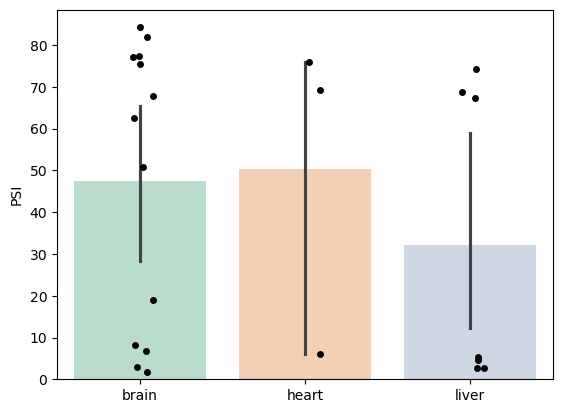

In [582]:
# show distribution of PSIs for a given event/gene - LIVER VS. BRAIN
event = 'HsaEX0031861'
# HsaEX0047257,HsaEX0047258

event_brain = inclusion_table[inclusion_table['EVENT'] == event].filter(like = 'FOREBRAIN')
event_liver = inclusion_table[inclusion_table['EVENT'] == event].filter(like = 'LIVER')
event_heart = inclusion_table[inclusion_table['EVENT'] == event].filter(like = 'HEART')

# build new data frame for the event
event_df = pd.DataFrame([event_brain.values[0], event_heart.values[0], event_liver.values[0]],
                         index=['brain','heart','liver']).T

# plot
sns.barplot(data = event_df, palette = 'Pastel2');
sns.stripplot(data = event_df, color = 'k');
plt.ylabel('PSI');

In [583]:
# more plotting
#sns.kdeplot(data = event_df, fill = True);
#sns.boxplot(data = event_df);
#sns.violinplot(data = event_df);

In [584]:
# Show statistical significance ?
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon

ttest_ind(event_brain.values[0], event_liver.values[0])

TtestResult(statistic=0.939643309860027, pvalue=0.359839996783321, df=18.0)

In [585]:
# dispine the size of the bars the values are not statistical significant ... even if we try more events ... 
# reason? -> track variability within tissues and not only between tissues (diff stages?)... more on that later

...

#### Which genes have more isoforms? 

In [586]:
# count how many events exist per gene
event_count = inclusion_table.groupby('GENE').count()['EVENT'].sort_values(ascending = False).head(10)
event_count

GENE
HNRNPA2B1    8
ATG4B        7
SDHA         7
ERCC1        6
METTL5       5
RBM6         5
CCM2         5
MARK3        5
FASTK        5
AUP1         5
Name: EVENT, dtype: int64


#### For one of those genes, how are the PSI values varying along the gene? and between Tissues?

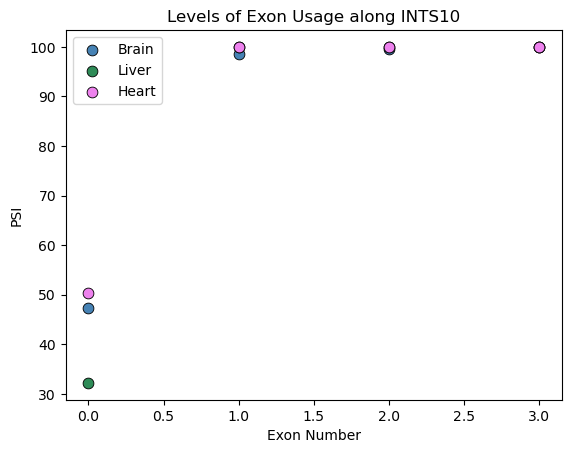

In [587]:
gene = 'INTS10'

brain_gene_exons = inclusion_table[inclusion_table['GENE'] == gene].filter(like = 'BRAIN').mean(axis = 1).reset_index(drop = True)
liver_gene_exons = inclusion_table[inclusion_table['GENE'] == gene].filter(like = 'LIVER').mean(axis = 1).reset_index(drop = True)
heart_gene_exons = inclusion_table[inclusion_table['GENE'] == gene].filter(like = 'HEART').mean(axis = 1).reset_index(drop = True)

#sns.scatter(data = [brain_gene_exons, liver_gene_exons])
#sns.boxplot(data = liver_gene_exons)

gene_exons_tissues = pd.DataFrame([brain_gene_exons, liver_gene_exons, heart_gene_exons], 
                                  index = ['BRAIN','LIVER', 'HEART']).T.reset_index()

# plot varation of exon inclusion along the gene
sns.scatterplot(data = gene_exons_tissues, x = 'index', y = 'BRAIN', color = 'steelblue', edgecolor = 'k', s = 60, label = 'Brain')
sns.scatterplot(data = gene_exons_tissues, x = 'index', y = 'LIVER', color = 'seagreen', edgecolor = 'k', s = 60, label = 'Liver')
sns.scatterplot(data = gene_exons_tissues, x = 'index', y = 'HEART', color = 'violet', edgecolor = 'k', s = 60, label = 'Heart')

# make it fancy
plt.title('Levels of Exon Usage along {}'.format(gene)) # add title
plt.ylabel('PSI'); plt.xlabel('Exon Number'); # format axis label
#plt.legend(frameon = False, loc = 4); # format legend
#sns.despine(trim=True) # make it look like R's plots

### <span style='color:darkblue'> Step 3 - Compare Brain vs. Liver
- Output from ***vast-tools diff***: performs a statistical test to assess whether the PSI distributions of the two compared groups are signficantly different.
- compares samples taking into account quality of reads and their contribution to the total pool <br>

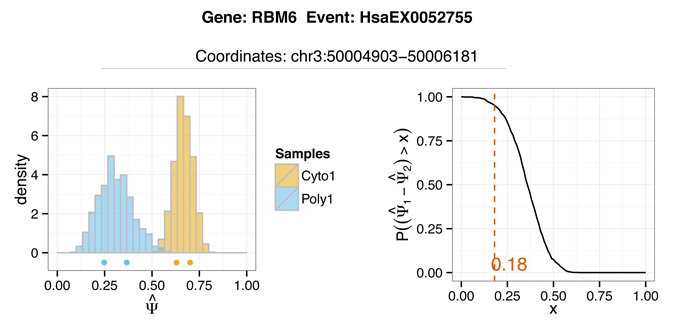

In [588]:
# import ouput from vast-tools diff
diff_brain_liver = pd.read_table('data/diff_brain_minus_liver.tab')
diff_brain_liver.sort_values('dPSI')

,GENE,EVENT,BRAIN,LIVER,dPSI,MV[dPsi]
412,EPN1,HsaEX0022820,0.135370,0.980334,-0.844964,0.56
415,SUGP2,HsaEX0062842,0.210153,0.955099,-0.744945,0.53
178,SGCE,HsaEX0057772,0.230930,0.912760,-0.681830,0.44
320,RPS6KB2,HsaEX0055638,0.311156,0.989725,-0.678569,0.49
688,RPAIN,HsaEX0055409,0.081635,0.744465,-0.662830,0.49
...,...,...,...,...,...,...
450,MARK3,HsaEX0037926,0.837963,0.215477,0.622485,0.71
1145,HM13,HsaEX0030146,0.697954,0.068044,0.629910,0.69
469,APLP2,HsaEX0005151,0.885946,0.147085,0.738861,0.81
1679,PSAP,HsaEX0050522,0.936706,0.147605,0.789100,0.83


#### Visualize the most relevant events

<Axes: xlabel='dPSI', ylabel='MV[dPsi]'>

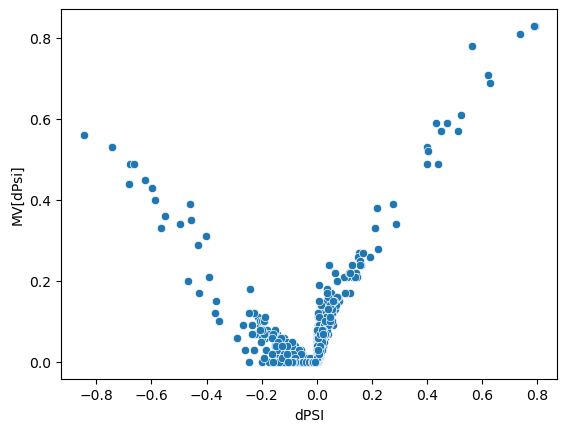

In [589]:
# plot delta psi vs. statistics
sns.scatterplot(data = diff_brain_liver, x = 'dPSI', y = 'MV[dPsi]')

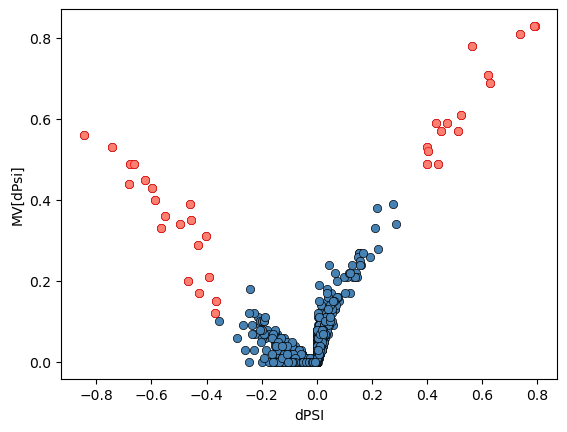

In [590]:
# color most relevant events in a different color
dpsi = 0.3
stat = 0.1

diff_brain_liver_filtered = diff_brain_liver[(abs(diff_brain_liver['dPSI']) > dpsi) 
                                              & (diff_brain_liver['MV[dPsi]'] > stat)]

sns.scatterplot(data = diff_brain_liver, x = 'dPSI', y = 'MV[dPsi]', color = 'steelblue', edgecolor = 'k')
sns.scatterplot(data = diff_brain_liver_filtered, x = 'dPSI', y = 'MV[dPsi]', color = 'salmon',  edgecolor = 'r');

#### Show as Heatmap

In [591]:
heatmap_data = diff_brain_liver_filtered[['GENE','BRAIN','LIVER']].set_index('GENE')
heatmap_data.head()

,BRAIN,LIVER
GENE,,
GNAS,0.974878,0.453331
INTS10,0.836123,0.045150
SGCE,0.230930,0.912760
GOLGA4,0.760807,0.361449
DST,0.427585,0.979659


<Axes: ylabel='GENE'>

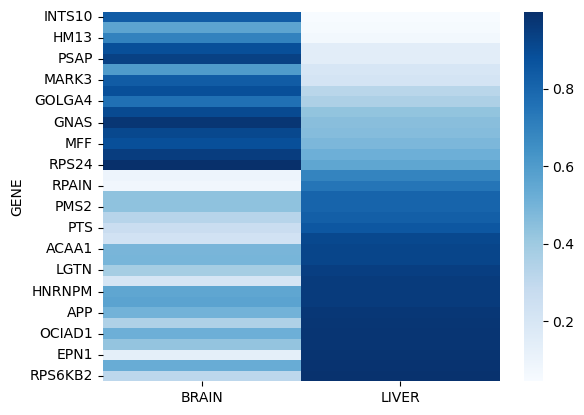

In [592]:
sns.heatmap(data = heatmap_data.sort_values('LIVER'), cmap='Blues')

#### Show distribution of PSIs for a given event/gene - BRAIN VS. LIVER

In [593]:
gene = 'INTS10'

gene_brain = inclusion_table[inclusion_table['GENE'] == gene].filter(like = 'FOREBRAIN')
gene_liver = inclusion_table[inclusion_table['GENE'] == gene].filter(like = 'LIVER')

# build new data frame for the event
gene_df = pd.DataFrame([gene_brain.values[0], gene_liver.values[0]], index=['brain','liver']).T

gene_brain = inclusion_table[['GENE','EVENT'] + gene_brain.columns.tolist()].loc[gene_brain.index]
gene_liver = inclusion_table[['GENE','EVENT'] + gene_liver.columns.tolist()].loc[gene_liver.index]

# melt table for plotting
gene_liver = gene_liver.melt(id_vars = ['GENE','EVENT'])
gene_brain = gene_brain.melt(id_vars = ['GENE','EVENT'])

gene_liver['tissue'] = 'LIVER'
gene_brain['tissue'] = 'BRAIN'

# combine into a table
gene_event = pd.concat([gene_liver, gene_brain])
gene_event

,GENE,EVENT,variable,value,tissue
0,INTS10,HsaEX0031861,LIVER.ADOLESCENT_ERR2598275,68.66,LIVER
1,INTS10,HsaEX0031855,LIVER.ADOLESCENT_ERR2598275,100.00,LIVER
2,INTS10,HsaEX0031853,LIVER.ADOLESCENT_ERR2598275,100.00,LIVER
3,INTS10,HsaEX0031852,LIVER.ADOLESCENT_ERR2598275,100.00,LIVER
4,INTS10,HsaEX0031861,LIVER.ELDERLY_ERR2598284,74.36,LIVER
...,...,...,...,...,...
47,INTS10,HsaEX0031852,FOREBRAIN.YOUNG_ADULT_ERR2598349,100.00,BRAIN
48,INTS10,HsaEX0031861,FOREBRAIN.YOUNG_ADULT_ERR2598350,6.82,BRAIN
49,INTS10,HsaEX0031855,FOREBRAIN.YOUNG_ADULT_ERR2598350,100.00,BRAIN
50,INTS10,HsaEX0031853,FOREBRAIN.YOUNG_ADULT_ERR2598350,100.00,BRAIN


<Axes: xlabel='EVENT', ylabel='value'>

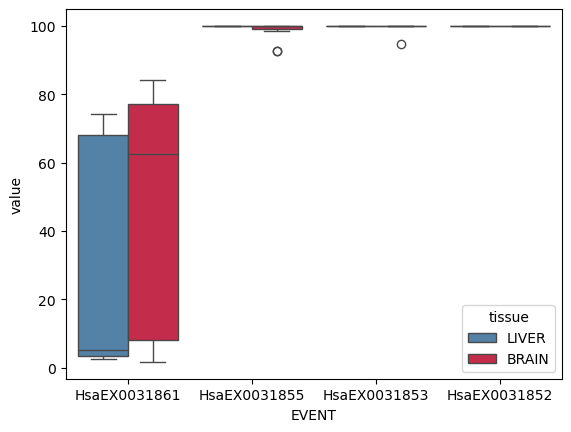

In [594]:
sns.boxplot(data = gene_event, x = 'EVENT', y = 'value', hue = 'tissue', palette=['steelblue','crimson'])
#sns.stripplot(data = gene_event, x = 'EVENT', y = 'value', hue = 'tissue', dodge = True, 
#              palette=['w','w'], edgecolor="k", linewidth=0.5)

#### Advanced Students -> if you're bored:
- Can the different in developmental stages (Young Adult vs. Elderly) explain such variance within the same tissue?

### <span style='color:darkblue'> Step 4 - Combine with Differential Expression Data

In [595]:
# import diff exp data
dge_brain_liver = pd.read_table('data/degs_brain_minus_liver.tab')

# combine with splicing data
diff_brain_liver_with_dge = diff_brain_liver.merge(dge_brain_liver)
diff_brain_liver_with_dge

,GENE,EVENT,BRAIN,LIVER,dPSI,MV[dPsi],baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,LAS1L,HsaEX0035417,0.970019,0.987019,-0.017000,0.00,2216.451365,1.131845,0.033133,34.160297,9.403849e-256,7.369309e-255
1,KRIT1,HsaEX0035028,0.988664,0.983987,0.004676,0.03,1180.963638,-0.436999,0.028604,-15.277385,1.081966e-52,3.161768e-52
2,LAP3,HsaEX0035326,0.926628,0.985192,-0.058563,0.00,3782.925400,-1.394485,0.064528,-21.610562,1.428978e-103,5.823388e-103
3,CD99,HsaEX0013932,0.736958,0.962170,-0.225211,0.07,5555.285346,-0.707994,0.050586,-13.995845,1.652536e-44,4.520092e-44
4,SPATA20,HsaEX0061239,0.988164,0.982821,0.005343,0.04,2841.875975,-0.599165,0.053631,-11.171980,5.592036e-29,1.312615e-28
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,GNAS,HsaEX0027840,0.162524,0.114485,0.048039,0.11,39418.743039,1.805893,0.038370,47.065367,8.400384e-101,9.881313e-324
1509,AP2M1,HsaEX0004932,0.965102,0.798988,0.166113,0.27,11593.784136,1.067185,0.036859,28.953033,2.570084e-184,1.538306e-183
1510,PSAP,HsaEX0050522,0.936706,0.147605,0.789100,0.83,37128.146691,-0.065664,0.035483,-1.850601,6.422698e-02,8.377957e-02
1511,PHB2,HsaEX0046902,0.991143,0.997811,-0.006669,0.00,6692.369149,-1.764197,0.034849,-50.623662,8.400384e-101,9.881313e-324


#### Plot Diff Expression Data vs. Diff Spliced Data

<Axes: xlabel='dPSI', ylabel='log2FoldChange'>

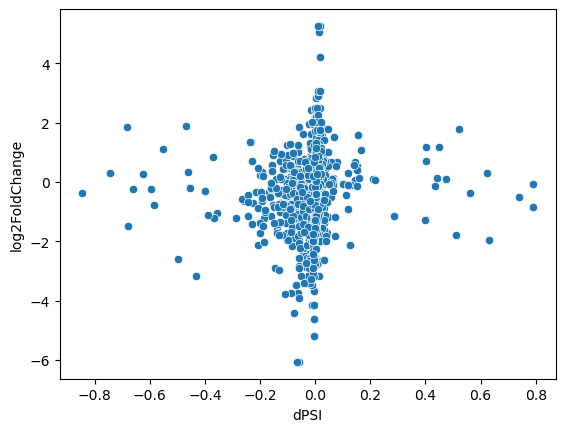

In [596]:
sns.scatterplot(data = diff_brain_liver_with_dge, x = 'dPSI', y = 'log2FoldChange')

#### What are the most relevant cases to look at?

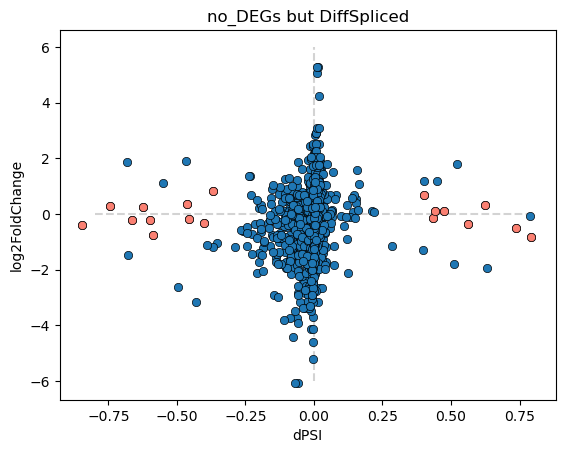

In [597]:
# conditions as variables
pval = 0.05
logFC = 1
psi = 0.3
mv = 0.1

# set conditions
conditions_noDEGs = ((diff_brain_liver_with_dge['padj'] < pval) & (abs(diff_brain_liver_with_dge['log2FoldChange']) < logFC) 
                & (abs(diff_brain_liver_with_dge['dPSI']) > psi) & (diff_brain_liver_with_dge['MV[dPsi]'] > mv))

diff_brain_liver_with_dge_noDEGs = diff_brain_liver_with_dge[conditions_noDEGs]
diff_brain_liver_with_dge_noDEGs

# plot relevant events on top of all events
sns.scatterplot(data = diff_brain_liver_with_dge, x = 'dPSI', y = 'log2FoldChange', edgecolor = 'k')
sns.scatterplot(data = diff_brain_liver_with_dge_noDEGs, x = 'dPSI', y = 'log2FoldChange', color = 'salmon', edgecolor = 'k');

plt.title('no_DEGs but DiffSpliced')
plt.vlines(x = 0, ymin = -6, ymax = 6, ls = '--', color = 'lightgray', zorder=0)
plt.hlines(y = 0, xmin = -0.8, xmax = 0.8, ls = '--', color = 'lightgray', zorder=0);

In [598]:
diff_brain_liver_with_dge_noDEGs

,GENE,EVENT,BRAIN,LIVER,dPSI,MV[dPsi],baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
99,INTS10,HsaEX0031861,0.836123,0.045150,0.790974,0.83,2600.429491,-0.829080,0.029056,-28.533782,4.464985e-179,2.609374e-178
373,EPN1,HsaEX0022820,0.135370,0.980334,-0.844964,0.56,9087.460409,-0.384722,0.043376,-8.869572,7.342783e-19,1.516099e-18
376,SUGP2,HsaEX0062842,0.210153,0.955099,-0.744945,0.53,7146.915388,0.290581,0.034866,8.334210,7.801715e-17,1.562374e-16
410,MARK3,HsaEX0037926,0.837963,0.215477,0.622485,0.71,2649.893737,0.310288,0.025446,12.194221,3.336789e-34,8.288500e-34
428,APLP2,HsaEX0005151,0.885946,0.147085,0.738861,0.81,16372.526637,-0.494385,0.039072,-12.653230,1.073676e-36,2.732260e-36
453,HNRNPM,HsaEX0030304,0.556693,0.957304,-0.400612,0.31,6586.020742,-0.309383,0.030948,-9.996866,1.572965e-23,3.458904e-23
531,DGUOK,HsaEX0019478,0.903423,0.430370,0.473053,0.59,990.610123,0.109089,0.033551,3.251489,1.148024e-03,1.671400e-03
607,KTN1,HsaEX0035087,0.603375,0.201359,0.402015,0.52,6619.048375,0.697112,0.045404,15.353521,3.354724e-53,9.851622e-53
619,RPAIN,HsaEX0055409,0.081635,0.744465,-0.662830,0.49,976.343881,-0.229757,0.028897,-7.951028,1.849708e-15,3.622124e-15
620,RPAIN,HsaEX0055410,0.094001,0.691341,-0.597340,0.43,976.343881,-0.229757,0.028897,-7.951028,1.849708e-15,3.622124e-15


#### What can this tell us in this context?

#### Functional Diversification
- Isoform-Specific Functions: Different functions without changing expression <br>
- Context-Specific Roles: Tailored to specific contexts (e.g., tissue, environment) <br>

#### What can this tell us in other contexts?

- Stress Responses: Adapt to stress without changing expression <br>
- Disease Mechanisms: Abnormal splicing linked to diseases <br>
- (...)

<h3 align = "left"> <img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3437557/bin/gr1.jpg" width="600"/> <br>
<h5 align = "left"> > doi: 10.1016/j.molcel.2012.05.039 <</h5>

In [599]:
# check PSI variation in the above plots

#### explore most relevant events - genes that are DEGs and DSG

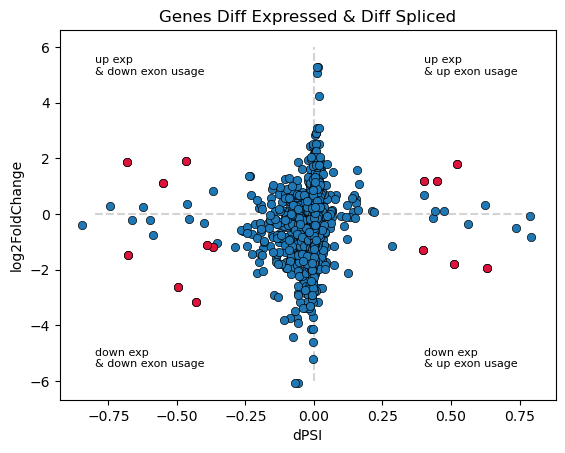

In [600]:
# conditions as variables
pval = 0.05
logFC = 1
psi = 0.3
mv = 0.1

# set conditions
conditions = ((diff_brain_liver_with_dge['padj'] < pval) & (abs(diff_brain_liver_with_dge['log2FoldChange']) > logFC) 
                & (abs(diff_brain_liver_with_dge['dPSI']) > psi) & (diff_brain_liver_with_dge['MV[dPsi]'] > mv))

diff_brain_liver_with_dge_filtered = diff_brain_liver_with_dge[conditions]
diff_brain_liver_with_dge_filtered

# plot relevant events on top of all events
sns.scatterplot(data = diff_brain_liver_with_dge, x = 'dPSI', y = 'log2FoldChange', edgecolor = 'k')
sns.scatterplot(data = diff_brain_liver_with_dge_filtered, x = 'dPSI', y = 'log2FoldChange', color = 'crimson', edgecolor = 'k');

plt.title('Genes Diff Expressed & Diff Spliced')
plt.vlines(x = 0, ymin = -6, ymax = 6, ls = '--', color = 'lightgray', zorder=0)
plt.hlines(y = 0, xmin = -0.8, xmax = 0.8, ls = '--', color = 'lightgray', zorder=0);

# labels with results info
plt.text(-0.8, -5.5, 'down exp \n& down exon usage', fontsize = 8)
plt.text(0.4, -5.5, 'down exp \n& up exon usage', fontsize = 8)
plt.text(-0.8, 5., 'up exp \n& down exon usage', fontsize = 8)
plt.text(0.4, 5., 'up exp \n& up exon usage', fontsize = 8);

**Possible Interpretation of Results**
- Increased gene expression and increased exon usage <br>
this particular isoform might be functionally important in the liver (not so much in the brain) <br>
splicing mechanisms produce an isoform that is necessary for particular cellular processes or responses in the liver
- Increased gene expression and decreased exon usage <br>
(similar as above - gene might be more important in the liver, but with a diferent isoform) <br>
- Decreased gene expression and increased exon usage <br>
This isoform might have a specific role even when the total gene product is less. <br>
Compensatory Mechanism: This isoform might have higher stability, distinct functionality, or regulatory significance <br>
- Decreased gene expression and decreased exon usage <br>
gene and specif isoform are less needed in this context <br>

**Take Home Mensage: By analyzing changes in both gene expression and exon inclusion we can gain insights into**
- Functional Isoforms: Identifying which isoforms are important in different conditions or stages.
- Regulatory Mechanisms: Understanding how splicing and transcriptional regulation are coordinated.
- Cellular Responses: Inferring how cells adapt their protein machinery in response to various stimuli or stresses.

### <span style='color:darkblue'> More exercicies ... (if we have the time)
- Explore PSI vs. developmental stage: compare mean PSI (adolescence vs. elderly)

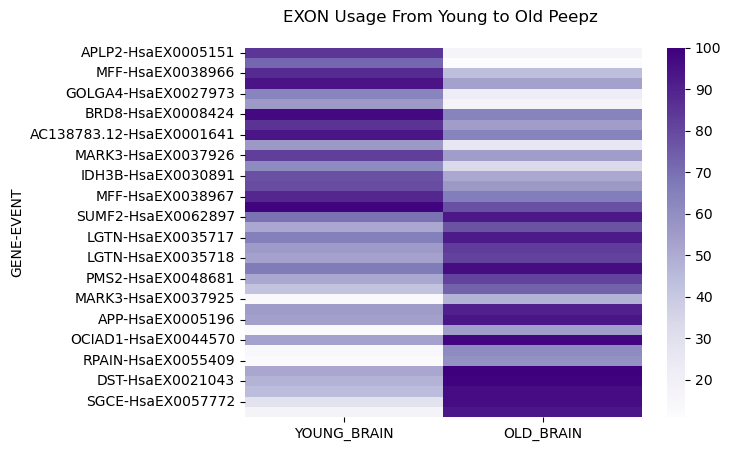

In [601]:
# import original data
inclusion_table = pd.read_table('data/betaAS_inclusion_table_reshaped.txt')

# filter for brain samples
brain_psis = inclusion_table.filter(like = 'BRAIN')

# rename columns and compare adolescent vs. elderly (extremes)
brain_psis.columns = brain_psis.columns.str.split('.').str[1].str.split('_ERR').str[0]
brain_adolescence_mean_psi = brain_psis['ADOLESCENT'].mean(axis = 1)
brain_elderly_mean_psi = brain_psis['ELDERLY'].mean(axis = 1)
brain_young_old_diff = brain_elderly_mean_psi - brain_adolescence_mean_psi

# build a new data frame
brain_old_young = pd.concat([inclusion_table[['GENE','EVENT']], 
                             brain_adolescence_mean_psi, 
                             brain_elderly_mean_psi,
                             brain_young_old_diff ], axis = 1)

brain_old_young.columns = ['GENE', 'EVENT','YOUNG_BRAIN', 'OLD_BRAIN', 'BRAIN_DIFF']

# sort by diff and keep only top events
brain_old_young = brain_old_young.sort_values('BRAIN_DIFF')
brain_old_young = brain_old_young[abs(brain_old_young['BRAIN_DIFF']) > 20]

# plotting
sns.heatmap(data = brain_old_young.set_index(['GENE','EVENT']).drop('BRAIN_DIFF', axis = 1), cmap = 'Purples');
plt.title('EXON Usage From Young to Old Peepz \n');